In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/obesity-or-cvd-risk-classifyregressorcluster/ObesityDataSet.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
data= pd.read_csv('/kaggle/input/obesity-or-cvd-risk-classifyregressorcluster/ObesityDataSet.csv')

In [4]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
data.tail()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


In [6]:
data.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [7]:
data=data.drop_duplicates()

<Axes: >

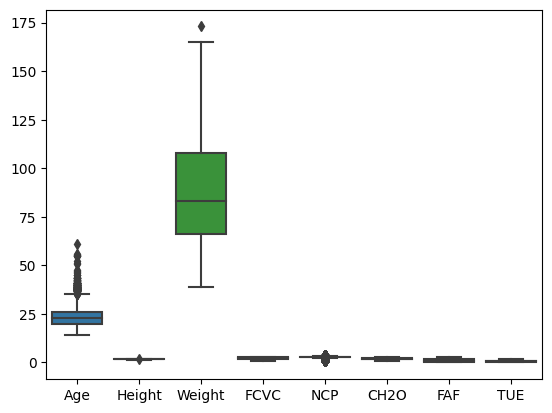

In [8]:
import seaborn as sns

sns.boxplot(data)

In [9]:
data['Age'] = data['Age'].astype(int)

In [10]:
data.dtypes

Gender                             object
Age                                 int64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [11]:
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
label_encoder = LabelEncoder()

In [14]:
for col in categorical_columns:
    data[col + '_encoded'] = label_encoder.fit_transform(data[col])

In [15]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,NObeyesdad,Gender_encoded,family_history_with_overweight_encoded,FAVC_encoded,CAEC_encoded,SMOKE_encoded,SCC_encoded,CALC_encoded,MTRANS_encoded,NObeyesdad_encoded
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,...,Normal_Weight,0,1,0,2,0,0,3,3,1
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,...,Normal_Weight,0,1,0,2,1,1,2,3,1
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,...,Normal_Weight,1,1,0,2,0,0,1,3,1
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,...,Overweight_Level_I,1,0,0,2,0,0,1,4,5
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,...,Overweight_Level_II,1,0,0,2,0,0,2,3,6


In [16]:
data = data.select_dtypes(exclude=['object'])

In [17]:
data.shape

(2087, 17)

In [18]:
data.tail()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_encoded,family_history_with_overweight_encoded,FAVC_encoded,CAEC_encoded,SMOKE_encoded,SCC_encoded,CALC_encoded,MTRANS_encoded,NObeyesdad_encoded
2106,20,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247,0,1,1,2,0,0,2,3,4
2107,21,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270,0,1,1,2,0,0,2,3,4
2108,22,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288,0,1,1,2,0,0,2,3,4
2109,24,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035,0,1,1,2,0,0,2,3,4
2110,23,1.738836,133.472641,3.0,3.0,2.863513,1.026452,0.714137,0,1,1,2,0,0,2,3,4


In [19]:
X=data.drop(['NObeyesdad_encoded'],axis=1)
y=data['NObeyesdad_encoded']

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X)

      Age    Height      Weight  FCVC  NCP      CH2O       FAF       TUE  \
0      21  1.620000   64.000000   2.0  3.0  2.000000  0.000000  1.000000   
1      21  1.520000   56.000000   3.0  3.0  3.000000  3.000000  0.000000   
2      23  1.800000   77.000000   2.0  3.0  2.000000  2.000000  1.000000   
3      27  1.800000   87.000000   3.0  3.0  2.000000  2.000000  0.000000   
4      22  1.780000   89.800000   2.0  1.0  2.000000  0.000000  0.000000   
...   ...       ...         ...   ...  ...       ...       ...       ...   
2106   20  1.710730  131.408528   3.0  3.0  1.728139  1.676269  0.906247   
2107   21  1.748584  133.742943   3.0  3.0  2.005130  1.341390  0.599270   
2108   22  1.752206  133.689352   3.0  3.0  2.054193  1.414209  0.646288   
2109   24  1.739450  133.346641   3.0  3.0  2.852339  1.139107  0.586035   
2110   23  1.738836  133.472641   3.0  3.0  2.863513  1.026452  0.714137   

      Gender_encoded  family_history_with_overweight_encoded  FAVC_encoded  \
0        

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logic=LogisticRegression()
logic.fit(X_train,y_train)
y_train_predict=logic.predict(X_train)
y_test_predict=logic.predict(X_test)
training_accuracy=accuracy_score(y_train,y_train_predict)
test_accuracy=accuracy_score(y_test,y_test_predict)
print(training_accuracy)
print(test_accuracy)

0.6608747753145596
0.645933014354067


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score,accuracy_score

In [24]:
from sklearn.svm import SVC
svc=SVC(probability=True)
svc.fit(X_train,y_train)
y_train_predict=svc.predict(X_train)
y_test_predict=svc.predict(X_test)
print(accuracy_score(y_train,y_train_predict))
print(accuracy_score(y_test,y_test_predict))

0.5686039544637508
0.5334928229665071


In [25]:
from sklearn.tree import DecisionTreeClassifier
Des=DecisionTreeClassifier()
Des.fit(X_train,y_train)
y_train_predict=Des.predict(X_train)
y_test_predict=Des.predict(X_test)
print(accuracy_score(y_train,y_train_predict))
print(accuracy_score(y_test,y_test_predict))

1.0
0.9186602870813397


In [26]:
from sklearn.ensemble import RandomForestClassifier
Ran=RandomForestClassifier()
Ran.fit(X_train,y_train)
y_train_predict=Ran.predict(X_train)
y_test_predict=Ran.predict(X_test)
print(accuracy_score(y_train,y_train_predict))
print(accuracy_score(y_test,y_test_predict))

1.0
0.9665071770334929


In [27]:
from sklearn.neighbors import KNeighborsClassifier
k=3
knn=KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train,y_train)
y_train_pred= knn.predict(X_train)
y_test_pred=knn.predict(X_test)
print(accuracy_score(y_train,y_train_pred))
print(accuracy_score(y_test,y_test_pred))

0.9352905931695626
0.8755980861244019


In [28]:
from sklearn.neighbors import KNeighborsClassifier
k=3
kd=KNeighborsClassifier(algorithm='kd_tree')
kd.fit(X_train,y_train)
y_train_pred= kd.predict(X_train)
y_test_pred=kd.predict(X_test)
print(accuracy_score(y_train,y_train_pred))
print(accuracy_score(y_test,y_test_pred))

0.908328340323547
0.868421052631579


In [29]:
from sklearn.metrics import classification_report

# Using Random Forest Classifier as an example
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Model Evaluation
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9665071770334929
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97        59
           1       0.87      0.97      0.91        61
           2       1.00      0.97      0.99        70
           3       1.00      1.00      1.00        64
           4       1.00      1.00      1.00        60
           5       0.98      0.89      0.93        55
           6       0.94      0.98      0.96        49

    accuracy                           0.97       418
   macro avg       0.97      0.97      0.97       418
weighted avg       0.97      0.97      0.97       418

